In [1]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

In [2]:
def objective(x):
    return x**2.0
 
# derivative of objective function
def derivative(x):
    return x * 2.0


In [3]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

In [4]:
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1

>0 f([-0.60932995]) = 0.37128
>1 f([-0.48746396]) = 0.23762
>2 f([-0.38997117]) = 0.15208
>3 f([-0.31197693]) = 0.09733
>4 f([-0.24958155]) = 0.06229
>5 f([-0.19966524]) = 0.03987
>6 f([-0.15973219]) = 0.02551
>7 f([-0.12778575]) = 0.01633
>8 f([-0.1022286]) = 0.01045
>9 f([-0.08178288]) = 0.00669
>10 f([-0.0654263]) = 0.00428
>11 f([-0.05234104]) = 0.00274
>12 f([-0.04187284]) = 0.00175
>13 f([-0.03349827]) = 0.00112
>14 f([-0.02679861]) = 0.00072
>15 f([-0.02143889]) = 0.00046
>16 f([-0.01715111]) = 0.00029
>17 f([-0.01372089]) = 0.00019
>18 f([-0.01097671]) = 0.00012
>19 f([-0.00878137]) = 0.00008
>20 f([-0.0070251]) = 0.00005
>21 f([-0.00562008]) = 0.00003
>22 f([-0.00449606]) = 0.00002
>23 f([-0.00359685]) = 0.00001
>24 f([-0.00287748]) = 0.00001
>25 f([-0.00230198]) = 0.00001
>26 f([-0.00184159]) = 0.00000
>27 f([-0.00147327]) = 0.00000
>28 f([-0.00117862]) = 0.00000
>29 f([-0.00094289]) = 0.00000


C:\Users\GSR1\AppData\Local\Temp\ipykernel_45952\4001804729.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


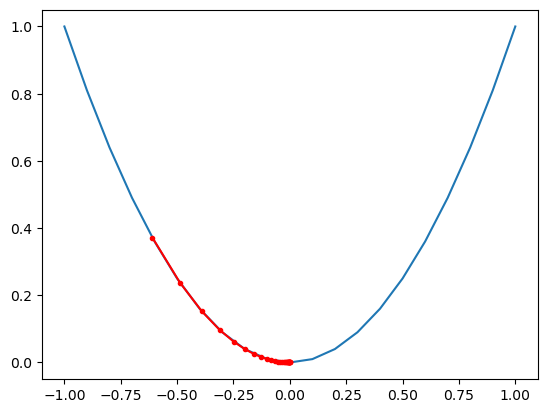

In [5]:
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [7]:
from sklearn.datasets import make_regression

In [8]:
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
m = 200

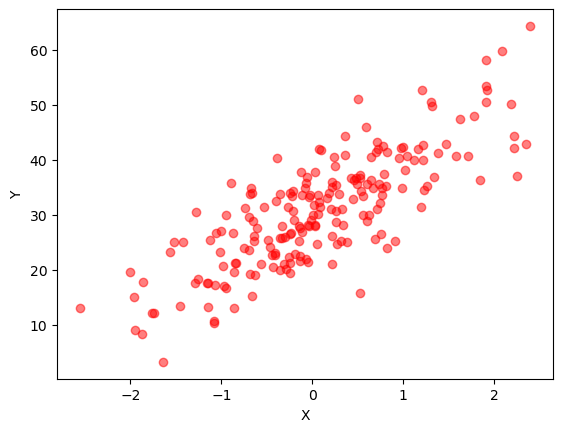

In [9]:
from matplotlib import pyplot as plt
plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
import numpy as np
def h(X,w):
    return (w[1]*np.array(X[:,0])+w[0])

In [11]:
def cost(w,X,y):
    return (.5/m) * np.sum(np.square(h(X,w)-np.array(y)))

In [12]:
def grad(w,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X,w)-np.array(y))
    g[1] = (1/m) * np.sum((h(X,w)-np.array(y))*np.array(X[:,0]))
    return g

In [13]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev,X,y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev,X,y)[0]
        w1 = w_prev[1] - lr*grad(w_prev,X,y)[1]
        w_new = [w0, w1]
        print(w_new)
        print(cost(w_new,X,y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-6):
            return w_new
        if j>500: 
            return w_new
        j+=1

In [14]:
w = [0,-1]

In [15]:
w = descent(w,w,.1)
print(w)

[0, -1]
540.5360663843456
[3.0956308633447547, 0.11442770988081663]
437.91139336428444
[5.873446610978822, 1.1023454281382854]
355.5039050187037
[8.366165526017987, 1.9778657783247602]
289.3267499184995
[10.603129563187093, 2.753547324958939]
236.1799750745718
[12.610653489037027, 3.440564026385428]
193.49509649539323
[14.412337853388406, 4.048856351454087]
159.2103901995911
[16.0293495446536, 4.587266032213945]
131.6708284668908
[17.480673291820082, 5.063656213710697]
109.54778810165583
[18.7833371265594, 5.485018573380515]
91.77462156224563
[19.952614505935692, 5.857568814053481]
77.49495508304668
[21.002205515744066, 6.186831784078626]
66.02119816099949
[21.944399323224108, 6.4777173436470505]
56.801246289923824
[22.79021982273288, 6.734587976310905]
49.39175789964725
[23.549556216205993, 6.961319037445921]
43.436706577550574
[24.23128008944935, 7.1613524356181975]
38.6501664442448
[24.843350383306017, 7.337744457271138]
34.802494555336104
[25.39290751357782, 7.493208368754656]
31.7

In [16]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x


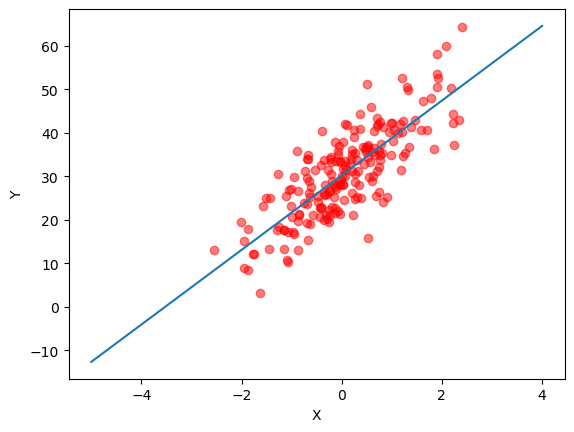

In [17]:
plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(-5,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()